In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('data/rainfall in india 1901-2015.csv')

In [7]:
df.head()

,DIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [9]:
df.shape

(4116, 19)

In [11]:
df.isnull().sum()

DIVISION     0
YEAR         0
JAN          4
FEB          3
MAR          6
APR          4
MAY          3
JUN          5
JUL          7
AUG          4
SEP          6
OCT          7
NOV         11
DEC         10
ANNUAL      26
Jan-Feb      6
Mar-May      9
Jun-Sep     10
Oct-Dec     13
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DIVISION  4116 non-null   object 
 1   YEAR      4116 non-null   int64  
 2   JAN       4112 non-null   float64
 3   FEB       4113 non-null   float64
 4   MAR       4110 non-null   float64
 5   APR       4112 non-null   float64
 6   MAY       4113 non-null   float64
 7   JUN       4111 non-null   float64
 8   JUL       4109 non-null   float64
 9   AUG       4112 non-null   float64
 10  SEP       4110 non-null   float64
 11  OCT       4109 non-null   float64
 12  NOV       4105 non-null   float64
 13  DEC       4106 non-null   float64
 14  ANNUAL    4090 non-null   float64
 15  Jan-Feb   4110 non-null   float64
 16  Mar-May   4107 non-null   float64
 17  Jun-Sep   4106 non-null   float64
 18  Oct-Dec   4103 non-null   float64
dtypes: float64(17), int64(1), object(1)
memory usage: 611.1+ KB


In [13]:
## segregate numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep',
       'Oct-Dec'],
      dtype='object')
Categorical Columns: Index(['DIVISION'], dtype='object')


In [14]:
df[categorical_columns].describe()

,DIVISION
count,4116
unique,36
top,NAGA MANI MIZO TRIPURA
freq,115


<Axes: >

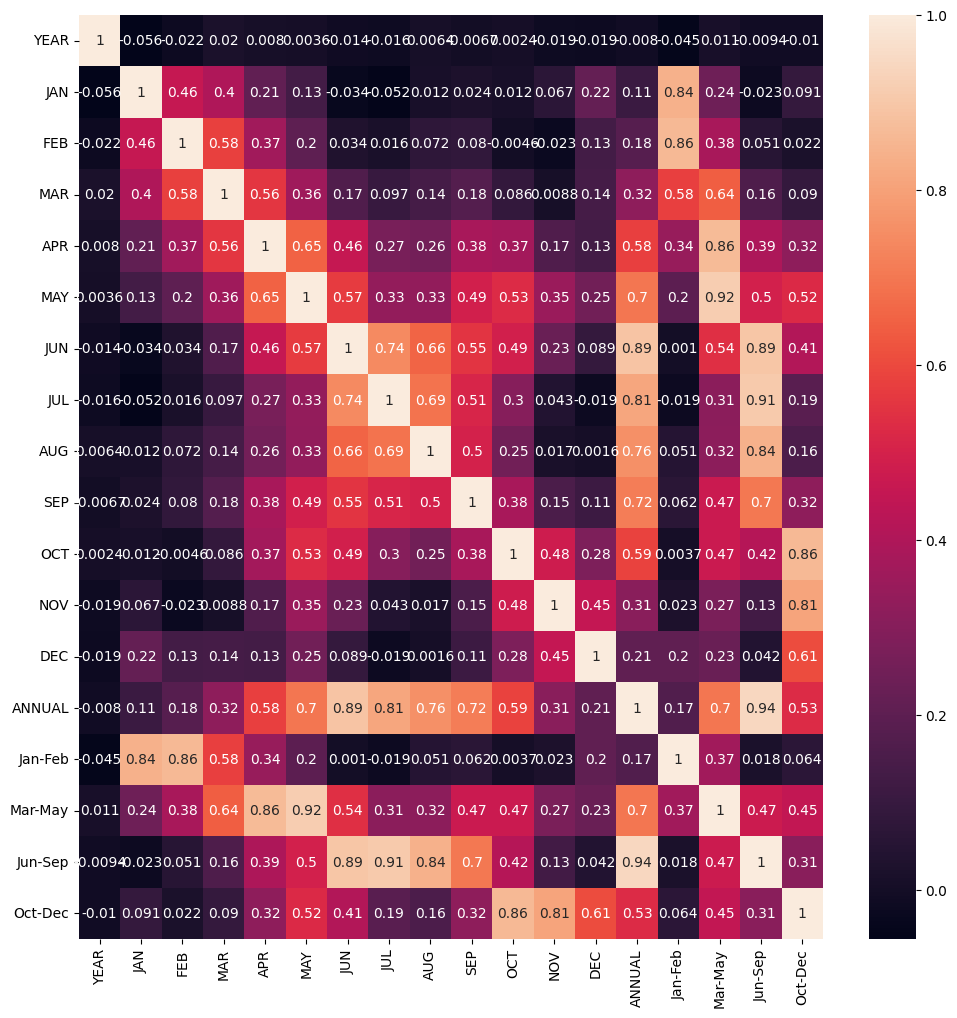

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(df[numerical_columns].corr(),annot=True)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'ANDAMAN & NICOBAR ISLANDS'),
  Text(1, 0, 'ARUNACHAL PRADESH'),
  Text(2, 0, 'ASSAM & MEGHALAYA'),
  Text(3, 0, 'BIHAR'),
  Text(4, 0, 'CHHATTISGARH'),
  Text(5, 0, 'COASTAL ANDHRA PRADESH'),
  Text(6, 0, 'COASTAL KARNATAKA'),
  Text(7, 0, 'EAST MADHYA PRADESH'),
  Text(8, 0, 'EAST RAJASTHAN'),
  Text(9, 0, 'EAST UTTAR PRADESH'),
  Text(10, 0, 'GANGETIC WEST BENGAL'),
  Text(11, 0, 'GUJARAT REGION'),
  Text(12, 0, 'HARYANA DELHI & CHANDIGARH'),
  Text(13, 0, 'HIMACHAL PRADESH'),
  Text(14, 0, 'JAMMU & KASHMIR'),
  Text(15, 0, 'JHARKHAND'),
  Text(16, 0, 'KERALA'),
  Text(17, 0, 'KONKAN & GOA'),
  Text(18, 0, 'LAKSHADWEEP'),
  Text(19, 0, 'MADHYA MAHARASHTRA'),
  Text(20, 0, 'MATATHWADA'),
  Text(21, 0, 'NAGA MANI MIZO TRIPURA'),
  Text(22, 0, 'NORTH INTERIOR KARNATAKA'

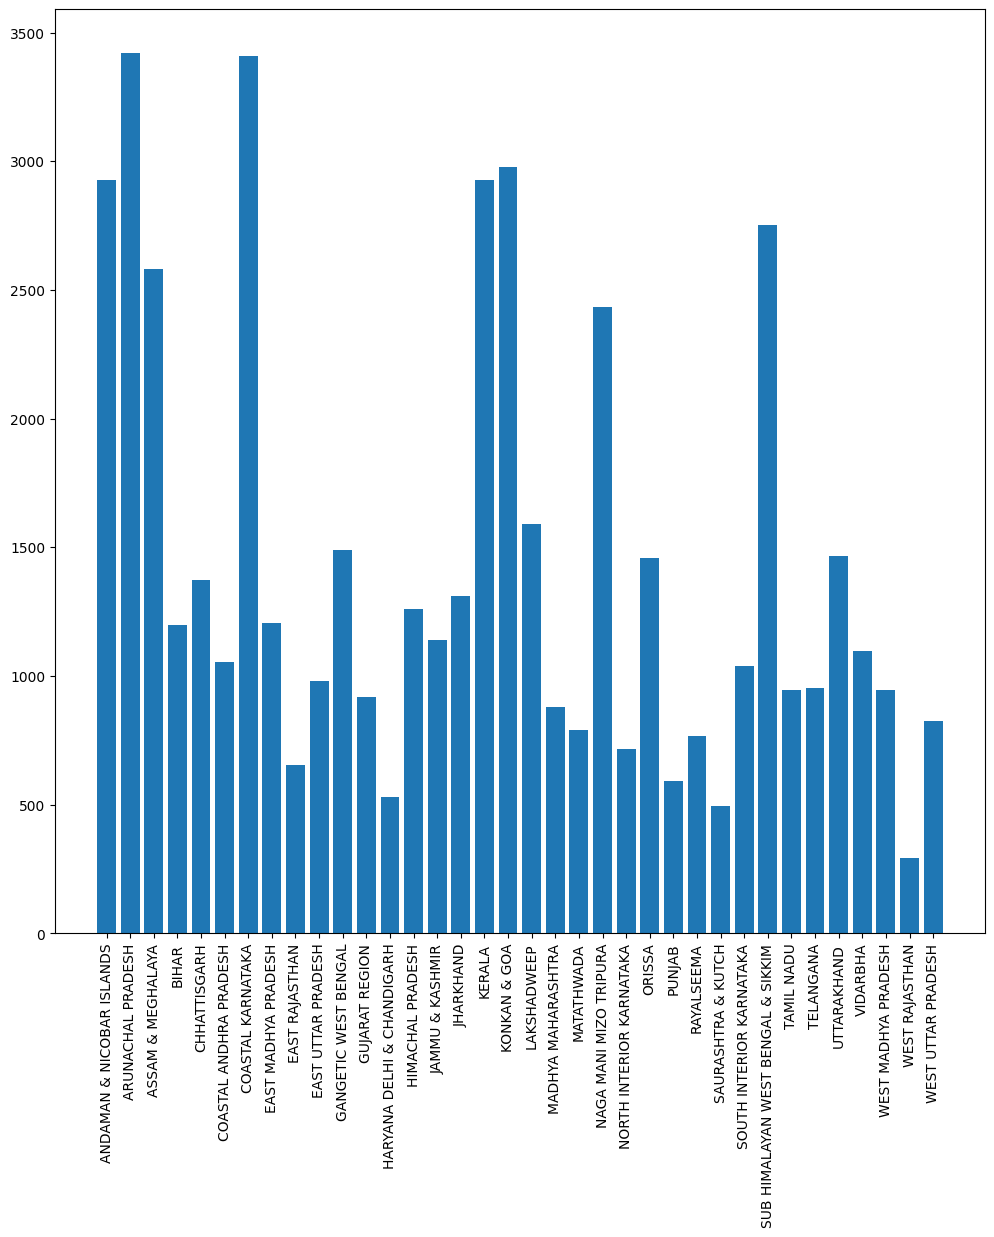

In [19]:
grouped_data = df.groupby('DIVISION')['ANNUAL'].mean()  # Compute mean rainfall per state
plt.figure(figsize=(12,12))
plt.bar(grouped_data.index, grouped_data.values)
plt.xticks(rotation=90)

<Axes: >

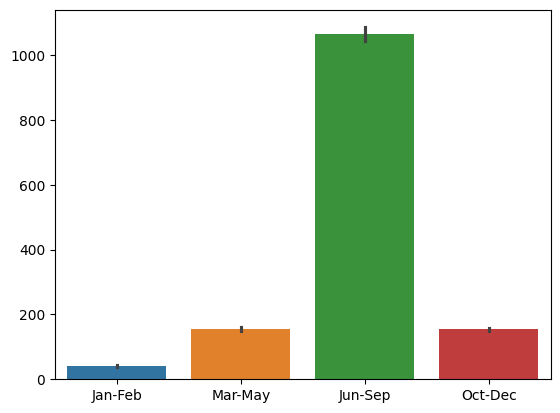

In [20]:
sns.barplot(df[['Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']])

JAN     18.957320
FEB     21.805325
MAR     27.359197
APR     43.127432
MAY     85.745417
JUN    230.234444
JUL    347.214334
AUG    290.263497
SEP    197.361922
OCT     95.507009
NOV     39.866163
DEC     18.870580
dtype: float64


<Axes: >

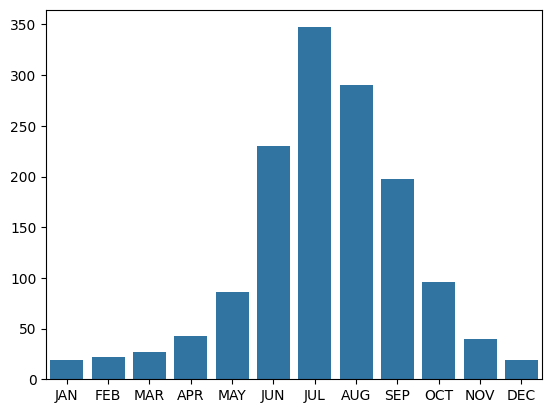

In [24]:
cols=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC']

month_rain=df[cols].mean()
print(month_rain)
sns.barplot(month_rain)

(array([], dtype=float64), [])

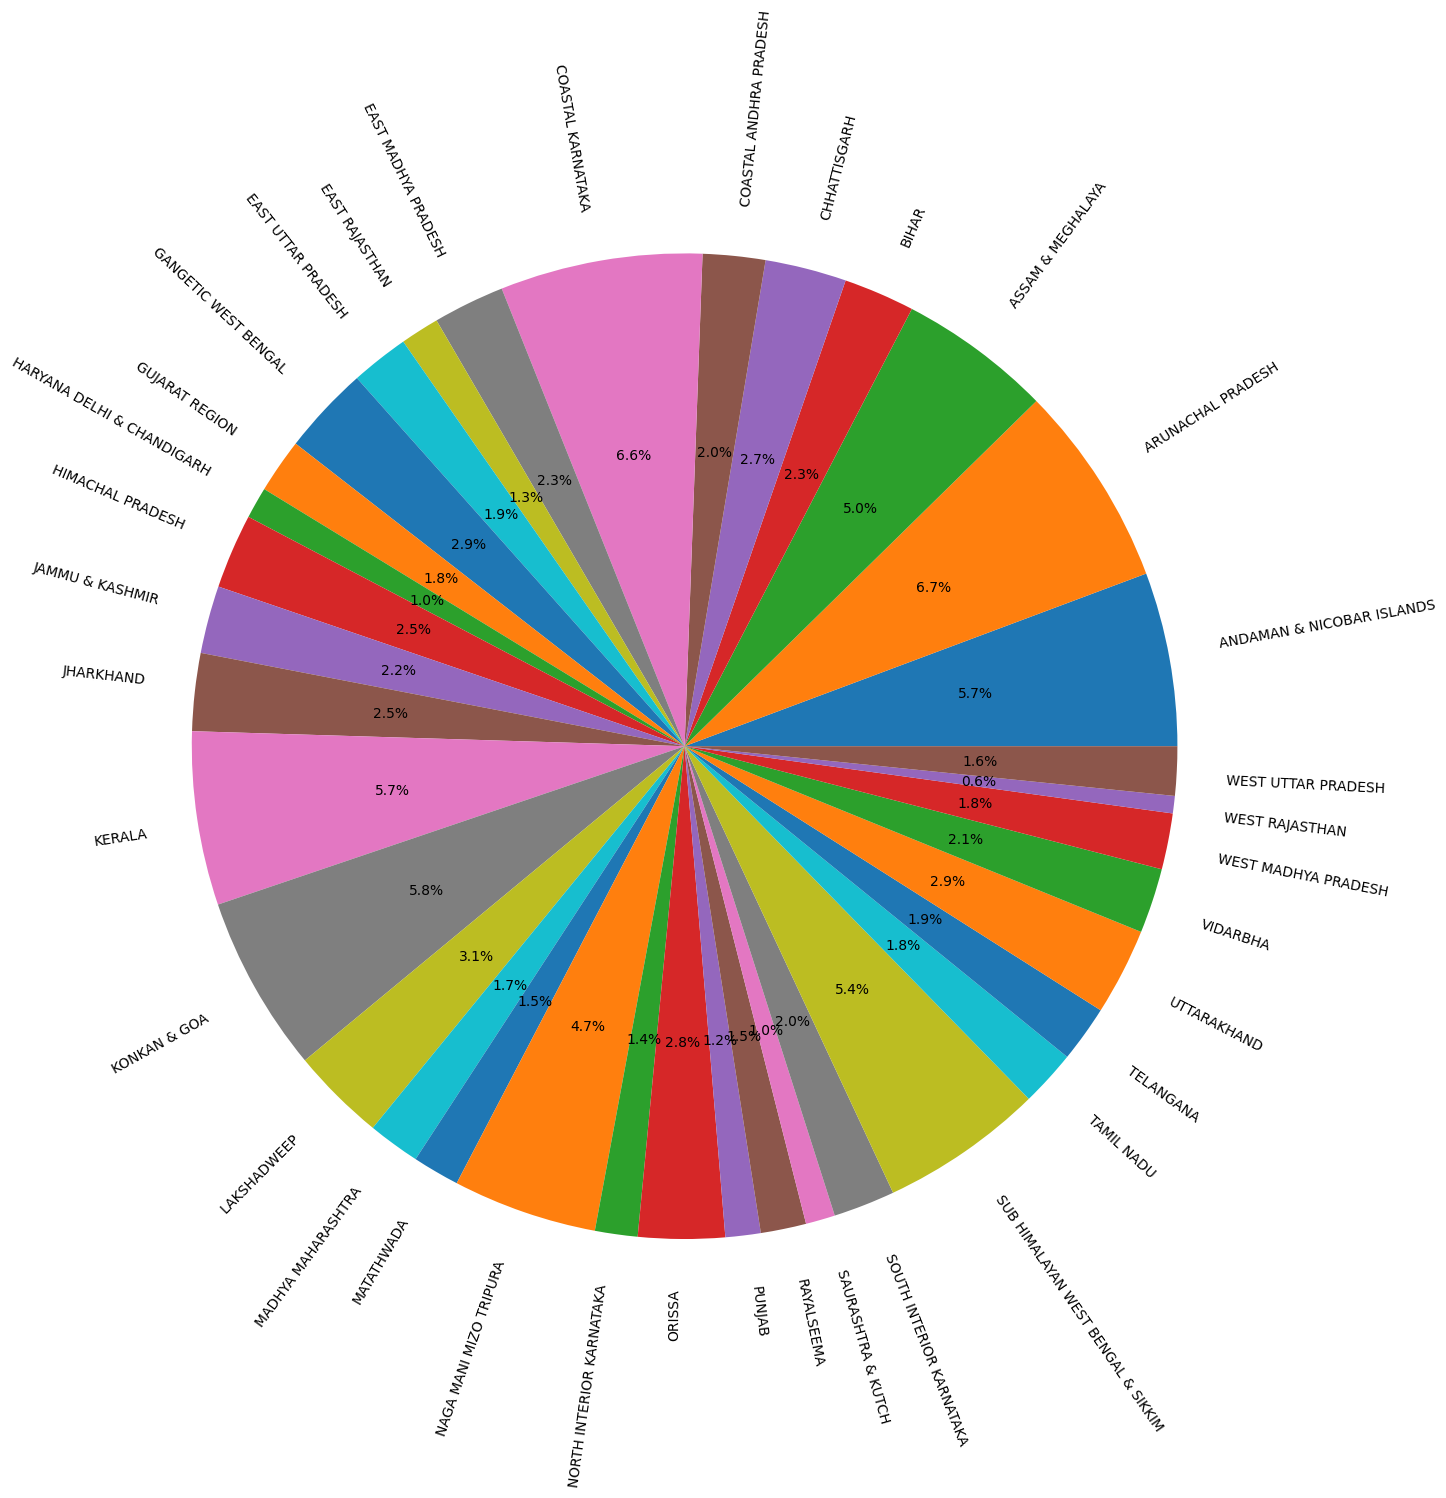

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(grouped_data,autopct='%1.1f%%',labels=grouped_data.index,rotatelabels=True,radius=2)
plt.xticks(rotation=90)